# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Jason Sinar Isac Saputra
- **Email:** isacsaputraaa@gmail.com
- **ID Dicoding:** MS081D5Y0488


## Menentukan Pertanyaan Bisnis


- Bagaimana progres harian penyewaan sepeda dari tahun 2011 hingga tahun 2013?

- Suhu seperti apa yang membuat para pelanggan bersemangat untuk bersepeda menyewa sepeda dari kita?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
uploaded = files.upload()
another = files.upload()

Saving day.csv to day.csv


Saving hour.csv to hour.csv


Mengimport dataset yang akan dianalisis


In [3]:
data_hari = pd.read_csv('day.csv')
data_jam = pd.read_csv('hour.csv')

In [6]:
data_hari.head()
data_jam.head()

,instant,dateday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [7]:
data_hari.isnull().sum()
data_hari.duplicated().sum()
print("Jumlah duplikasi: ", data_hari.duplicated().sum())
print("Data kosong: ", data_hari.isnull().sum())


Jumlah duplikasi:  0
Data kosong:  instant       0
dateday       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
data_jam.isnull().sum()
data_jam.duplicated().sum()
print("Jumlah duplikasi: ", data_jam.duplicated().sum())
print("Data kosong: ", data_jam.isnull().sum())

Jumlah duplikasi:  0
Data kosong:  instant       0
dateday       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- data yang akan dianalisa sudah bersih, tidak memiliki data yang duplikasi
- data yang akan dianalisa tidak memiliki nilai kosong

### Cleaning Data

In [9]:
data_hari.drop(columns=['instant'], inplace=True)
data_jam.drop(columns=['instant'], inplace=True)

**Insight:**
- Menghapus kolom yang tidak diperlukan


## Exploratory Data Analysis (EDA)

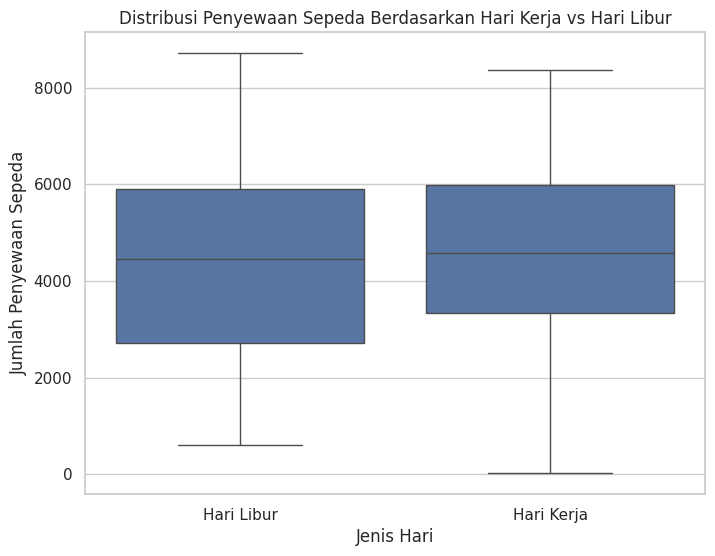

Rata-rata penyewaan pada hari kerja: 4584.82
Rata-rata penyewaan pada hari libur: 4330.168831168831


In [10]:
sns.set(style="whitegrid")

# Analisis Penyewaan Berdasarkan Hari Kerja vs Hari Libur
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_hari["workingday"], y=data_hari["cnt"])
plt.xticks(ticks=[0, 1], labels=["Hari Libur", "Hari Kerja"])
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Hari Kerja vs Hari Libur")
plt.xlabel("Jenis Hari")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

avg_workingday = data_hari[data_hari["workingday"] == 1]["cnt"].mean()
avg_weekend = data_hari[data_hari["workingday"] == 0]["cnt"].mean()
print(f"Rata-rata penyewaan pada hari kerja: {avg_workingday}")
print(f"Rata-rata penyewaan pada hari libur: {avg_weekend}")


### Explore ...

In [11]:
deskripsi_hari = data_hari.describe()
deskripsi_jam = data_jam.describe()
print(deskripsi_hari)
print(deskripsi_jam)

           season          yr        mnth     holiday     weekday  workingday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    0.500684    6.519836    0.028728    2.997264    0.683995   
std      1.110807    0.500342    3.451913    0.167155    2.004787    0.465233   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.544894    0.183051    0.162961    0.142429    0.0774

**Insight:**
- mendeskripsikan data


In [12]:
#menyimpan dataset yang sudah dibersihkan
data_hari.to_csv("cleaned_day.csv", index=False)
data_jam.to_csv("cleaned_hour.csv", index=False)

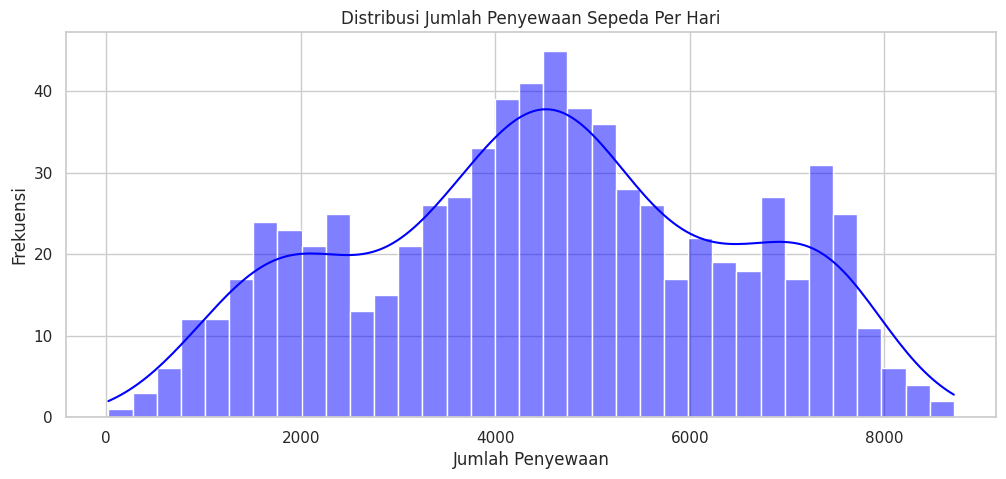

In [13]:
plt.figure(figsize=(12, 5))
sns.histplot(data_hari['cnt'], bins=35, kde=True, color='blue')
plt.title("Distribusi Jumlah Penyewaan Sepeda Per Hari")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Frekuensi")
plt.show()

- Visualisasi statistik jumlah penyewaan sepeda per hari

## Visualization & Explanatory Analysis

<Axes: xlabel='season'>

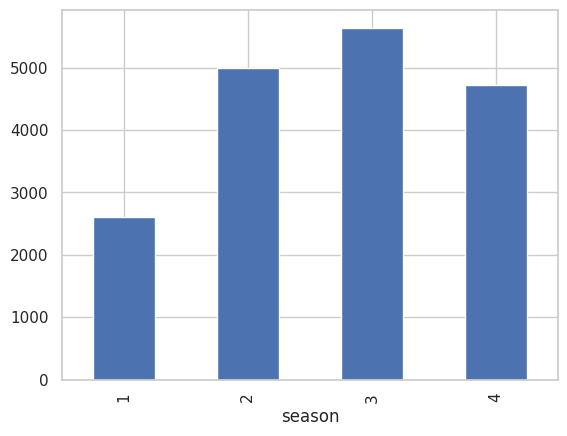

In [14]:
data_hari.groupby('season')['cnt'].mean().plot(kind='bar',)

- jumlah penyewaan sepeda pada musim ke 3 (musim gugur) adalah yang terbanyak, hal ini mungkin karena musim gugur memiliki suhu yang nyaman dan pemandangan yang indah untuk bersepeda

### Bagaimana progres harian penyewaan sepeda dari tahun ke tahun? :

<ipython-input-16-83fd770695b6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_hari["dateday"] = pd.to_datetime(data_hari["dateday"])


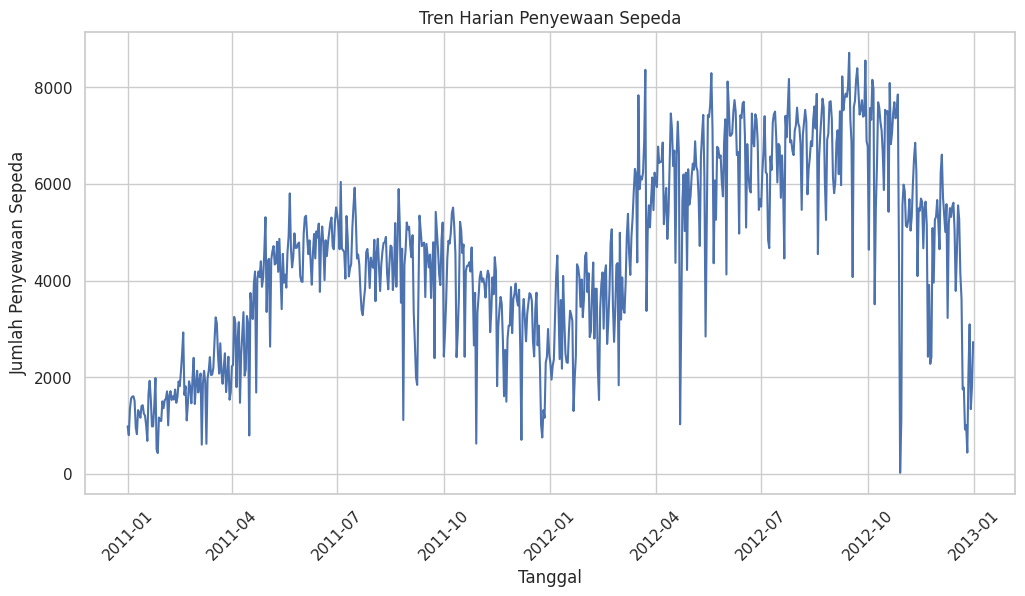

In [16]:
data_hari["dateday"] = pd.to_datetime(data_hari["dateday"])
plt.figure(figsize=(12, 6))
sns.lineplot(x=data_hari["dateday"], y=data_hari["cnt"], color='b')
plt.title("Tren Harian Penyewaan Sepeda")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Suhu seperti apa yang membuat para pelanggan bersemangat untuk bersepeda menyewa sepeda dari kita? :

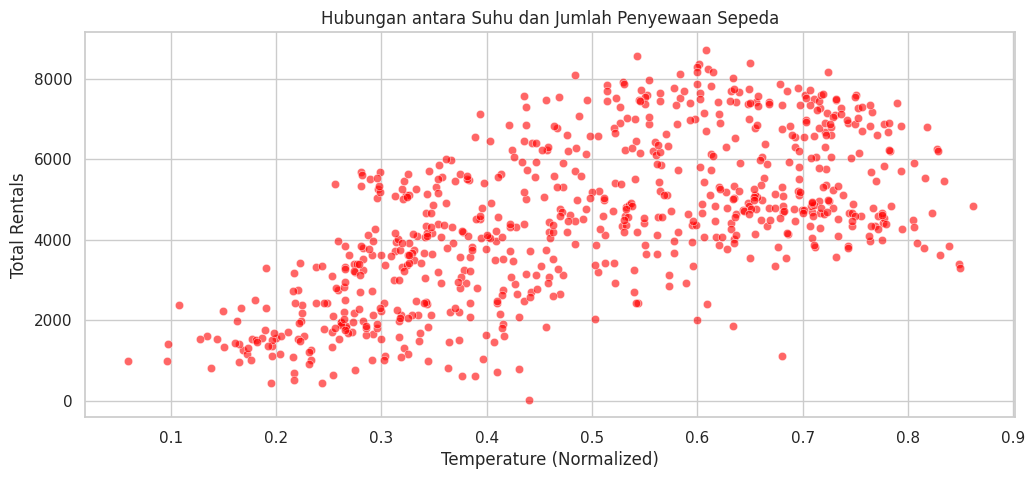

In [17]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=data_hari['temp'], y=data_hari['cnt'], alpha=0.6, color='red')
plt.xlabel("Temperature (Normalized)")
plt.ylabel("Total Rentals")
plt.title("Hubungan antara Suhu dan Jumlah Penyewaan Sepeda")
plt.grid(True)
plt.show()

## Kesimpulan pertanyaan 1

- 1. Tren Umum Meningkat: Terlihat adanya peningkatan jumlah penyewaan sepeda seiring berjalannya waktu, terutama dari tahun 2011 ke 2013.
- 2. Lonjakan dan Penurunan Sesekali: Ada beberapa titik dengan penurunan tajam yang bisa disebabkan oleh faktor seperti cuaca ekstrem atau hari libur.
- 3. Selama beberapa kali pada tahun 2012 penyewaan sepeda sempat mencapai lebih dari 8000 sepeda yang disewakan

## Kesimpulan Pertanyaan 2

- 1. Ada pola naik dan turun yang kemungkinan besar berkaitan dengan musim, misalnya: jumlah penyewaan mungkin lebih tinggi saat musim panas dan lebih rendah di musim dingin.
- 2. Semakin tinggi suhu, semakin banyak jumlah penyewaan sepeda. Hal ini masuk akal karena orang lebih cenderung menggunakan sepeda saat cuaca lebih hangat.
- 3. Setelah mencapai suhu tertentu (mendekati nilai 1 dalam skala normalisasi), jumlah penyewaan cenderung tidak meningkat lebih jauh, mungkin karena suhu yang terlalu panas tidak nyaman untuk bersepeda.
- 4. penyewaan sepeda terbanyak terjadi pada musim gugur dan musim panas, dapat diketahui jika para pesepeda menyukai suhu normal atau hangat untuk bersepeda